<a href="https://colab.research.google.com/github/ElsCorporation/ChallengeAlluraStore/blob/main/AluraStoreBrEdinhoLima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [73]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [74]:
somaTotalLoja01 = loja['Preço'].sum()
somaTotalLoja02 = loja2['Preço'].sum()
somaTotalLoja03 = loja3['Preço'].sum()
somaTotalLoja04 = loja4['Preço'].sum()

print(f'Faturamento de cada loja:\n\nLoja 01: R$ {somaTotalLoja01}\nLoja 02: R$ {somaTotalLoja02}\nLoja 03: R$ {somaTotalLoja03}\nLoja 04: R$ {somaTotalLoja04}')

Faturamento de cada loja:

Loja 01: R$ 1534509.12
Loja 02: R$ 1488459.06
Loja 03: R$ 1464025.03
Loja 04: R$ 1384497.58


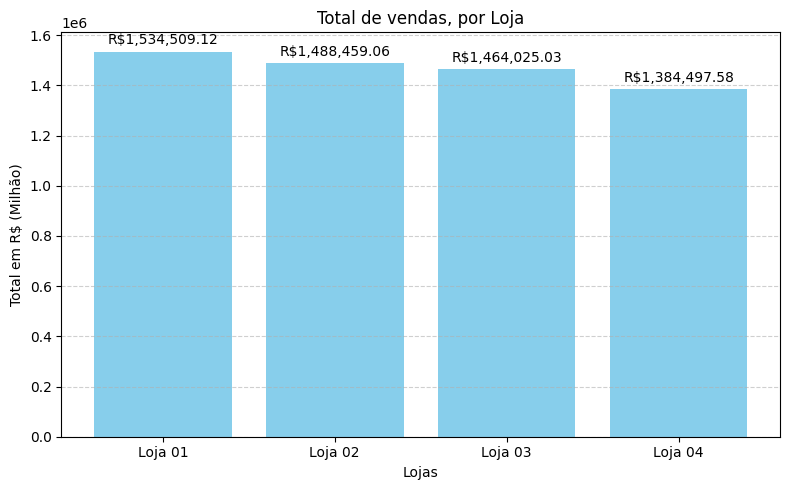

In [75]:
import matplotlib.pyplot as plt

lojas = ['Loja 01', 'Loja 02', 'Loja 03', 'Loja 04']
valores = [somaTotalLoja01, somaTotalLoja02, somaTotalLoja03, somaTotalLoja04]

fig, ax = plt.subplots(figsize=(8,5))

barras = ax.bar(lojas, valores, color='skyblue')
ax.set_title('Total de vendas, por Loja')
ax.set_xlabel('Lojas')
ax.set_ylabel('Total em R$ (Milhão)')
ax.grid(axis='y', linestyle='--', alpha=0.6)

ax.bar_label(barras, labels=[f'R${v:,.2f}' for v in valores], padding=3)
plt.tight_layout()
plt.show()

# 2. Vendas por Categoria


In [76]:
contagemCategoriasLoja01 = loja['Categoria do Produto'].value_counts()
contagemCategoriasLoja02 = loja2['Categoria do Produto'].value_counts()
contagemCategoriasLoja03 = loja3['Categoria do Produto'].value_counts()
contagemCategoriasLoja04 = loja4['Categoria do Produto'].value_counts()

print('\nLoja 01:\n',contagemCategoriasLoja01)
print('\nLoja 02:\n',contagemCategoriasLoja02)
print('\nLoja 03:\n',contagemCategoriasLoja03)
print('\nLoja 04:\n',contagemCategoriasLoja04)


Loja 01:
 Categoria do Produto
moveis                   465
eletronicos              448
brinquedos               324
eletrodomesticos         312
esporte e lazer          284
instrumentos musicais    182
livros                   173
utilidades domesticas    171
Name: count, dtype: int64

Loja 02:
 Categoria do Produto
moveis                   442
eletronicos              422
brinquedos               313
eletrodomesticos         305
esporte e lazer          275
instrumentos musicais    224
livros                   197
utilidades domesticas    181
Name: count, dtype: int64

Loja 03:
 Categoria do Produto
moveis                   499
eletronicos              451
brinquedos               315
eletrodomesticos         278
esporte e lazer          277
livros                   185
instrumentos musicais    177
utilidades domesticas    177
Name: count, dtype: int64

Loja 04:
 Categoria do Produto
moveis                   480
eletronicos              451
brinquedos               338
esporte e l

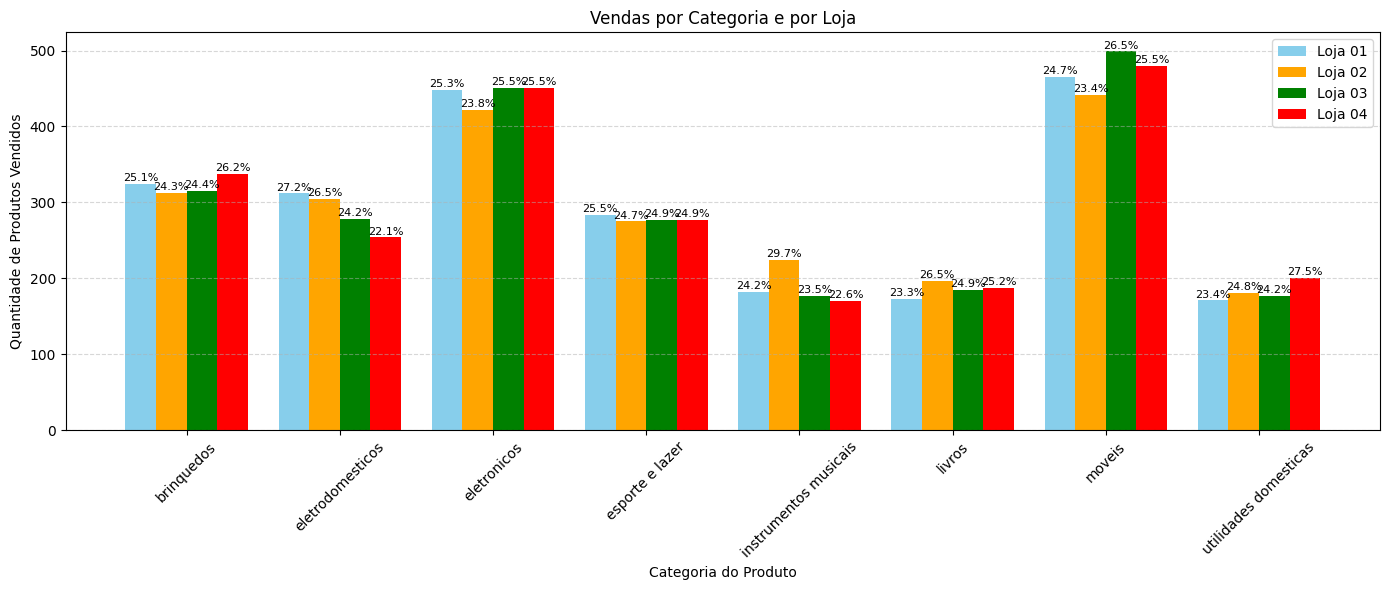

In [79]:
df = pd.DataFrame({
    'Loja 01': contagemCategoriasLoja01,
    'Loja 02': contagemCategoriasLoja02,
    'Loja 03': contagemCategoriasLoja03,
    'Loja 04': contagemCategoriasLoja04
})

categorias = df.index
n_categorias = len(categorias)
x = np.arange(n_categorias)
largura = 0.2


fig, ax = plt.subplots(figsize=(14, 6))


b1 = ax.bar(x - 1.5*largura, df['Loja 01'], width=largura, label='Loja 01', color='skyblue')
b2 = ax.bar(x - 0.5*largura, df['Loja 02'], width=largura, label='Loja 02', color='orange')
b3 = ax.bar(x + 0.5*largura, df['Loja 03'], width=largura, label='Loja 03', color='green')
b4 = ax.bar(x + 1.5*largura, df['Loja 04'], width=largura, label='Loja 04', color='red')

total_por_categoria = df.sum(axis=1).values

def adicionar_porcentagens(barras, total_por_categoria):
    for i, bar in enumerate(barras):
        altura = bar.get_height()
        if total_por_categoria[i] > 0:
            porcentagem = (altura / total_por_categoria[i]) * 100
            ax.text(bar.get_x() + bar.get_width()/2, altura + 1,
                    f'{porcentagem:.1f}%', ha='center', va='bottom', fontsize=8)

adicionar_porcentagens(b1, total_por_categoria)
adicionar_porcentagens(b2, total_por_categoria)
adicionar_porcentagens(b3, total_por_categoria)
adicionar_porcentagens(b4, total_por_categoria)

ax.set_xlabel('Categoria do Produto')
ax.set_ylabel('Quantidade de Produtos Vendidos')
ax.set_title('Vendas por Categoria e por Loja')
ax.set_xticks(x)
ax.set_xticklabels(categorias, rotation=45)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

# 3. Média de Avaliação das Lojas

In [80]:
mediaSatisfacaoLoja01 = round(loja['Avaliação da compra'].mean(), 2)
mediaSatisfacaoLoja02 = round(loja2['Avaliação da compra'].mean(), 2)
mediaSatisfacaoLoja03 = round(loja3['Avaliação da compra'].mean(), 2)
mediaSatisfacaoLoja04 = round(loja4['Avaliação da compra'].mean(), 2)

print(f'Média de satisfação por loja: \n\nLoja 01: {mediaSatisfacaoLoja01}\nLoja 02: {mediaSatisfacaoLoja02}\nLoja 03: {mediaSatisfacaoLoja03}\nLoja 04: {mediaSatisfacaoLoja04}')


Média de satisfação por loja: 

Loja 01: 3.98
Loja 02: 4.04
Loja 03: 4.05
Loja 04: 4.0


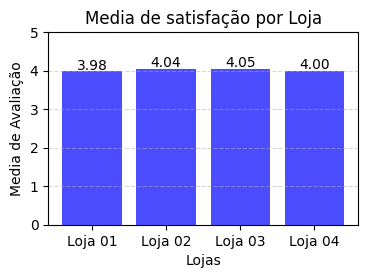

In [81]:
import matplotlib.pyplot as plt

medias = [
    mediaSatisfacaoLoja01,
    mediaSatisfacaoLoja02,
    mediaSatisfacaoLoja03,
    mediaSatisfacaoLoja04
]

lojas = ['Loja 01', 'Loja 02', 'Loja 03', 'Loja 04']

plt.figure(figsize=(4,2.5))
plt.bar(lojas, medias, color='blue', alpha=0.7)

for i, valor in enumerate(medias):
  plt.text(i, valor + 0.05, f'{valor:.2f}', ha='center')

plt.title('Media de satisfação por Loja')
plt.xlabel('Lojas')
plt.ylabel('Media de Avaliação')
plt.ylim(0,5)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()


# 4. Produtos Mais e Menos Vendidos

In [82]:
def buscarProdutoMaisVendido (nomeLoja: list, produto: str) -> tuple[list[str], int]:
  nomeProduto = nomeLoja[produto].value_counts()
  maior = nomeProduto.max()
  quantidadeProduto = nomeLoja[produto].value_counts().max()
  produtos = nomeProduto[nomeProduto == maior].index.tolist()

  return produtos, quantidadeProduto

def buscarProdutoMenosVendido (nomeLoja: list, produto: str) -> tuple[list[str], int]:
  nomeProduto = nomeLoja[produto].value_counts()
  menor = nomeProduto.min()
  quantidadeProduto = nomeLoja[produto].value_counts().min()

  produtos = nomeProduto[nomeProduto == menor].index.tolist()

  return produtos, quantidadeProduto

print(f'Produto(s) mais vendido(s):\n\nLoja 01: {buscarProdutoMaisVendido(loja, "Produto")}\nLoja 02: {buscarProdutoMaisVendido(loja2, "Produto")}\nLoja 03: {buscarProdutoMaisVendido(loja3, "Produto")}\nLoja 04: {buscarProdutoMaisVendido(loja4,"Produto")}\n\n')
print(f'Produto(s) menos vendido(s):\n\nLoja 01: {buscarProdutoMenosVendido(loja, "Produto")}\nLoja 02: {buscarProdutoMenosVendido(loja2, "Produto")}\nLoja 03: {buscarProdutoMenosVendido(loja3, "Produto")}\nLoja 04: {buscarProdutoMenosVendido(loja4, "Produto")}\n\n')


Produto(s) mais vendido(s):

Loja 01: (['Micro-ondas', 'TV Led UHD 4K', 'Guarda roupas'], 60)
Loja 02: (['Iniciando em programação'], 65)
Loja 03: (['Kit banquetas'], 57)
Loja 04: (['Cama box'], 62)


Produto(s) menos vendido(s):

Loja 01: (['Headset', 'Celular ABXY'], 33)
Loja 02: (['Jogo de tabuleiro'], 32)
Loja 03: (['Blocos de montar'], 35)
Loja 04: (['Guitarra'], 33)




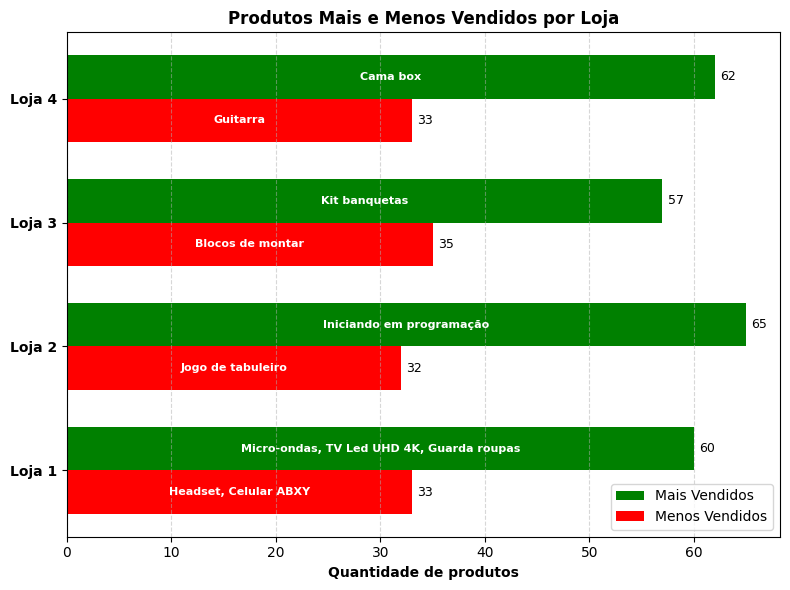

In [83]:
import matplotlib.pyplot as plt
import numpy as np

lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
dados_lojas = [loja, loja2, loja3, loja4]

produtos_mais = []
qtds_mais = []
produtos_menos = []
qtds_menos = []

for dados in dados_lojas:
    mais, qtd_max = buscarProdutoMaisVendido(dados, 'Produto')
    menos, qtd_min = buscarProdutoMenosVendido(dados, 'Produto')
    produtos_mais.append(', '.join(mais))
    qtds_mais.append(qtd_max)
    produtos_menos.append(', '.join(menos))
    qtds_menos.append(qtd_min)

y = np.arange(len(lojas))
altura_barra = 0.35

fig, ax = plt.subplots(figsize=(8, 6))


ax.barh(y + altura_barra/2, qtds_mais, height=altura_barra, color='green', label='Mais Vendidos')
ax.barh(y - altura_barra/2, qtds_menos, height=altura_barra, color='red', label='Menos Vendidos')

for i in range(len(lojas)):
    ax.text(qtds_mais[i] / 2, y[i] + altura_barra/2, produtos_mais[i], va='center', ha='center', color='white', fontweight='bold', fontsize=8)
    ax.text(qtds_menos[i] / 2, y[i] - altura_barra/2, produtos_menos[i], va='center', ha='center', color='white', fontweight='bold', fontsize=8)

    ax.text(qtds_mais[i] + 0.5, y[i] + altura_barra/2, f'{qtds_mais[i]}', va='center', ha='left', fontsize=9)
    ax.text(qtds_menos[i] + 0.5, y[i] - altura_barra/2, f'{qtds_menos[i]}', va='center', ha='left', fontsize=9)

ax.set_yticks(y)
ax.set_yticklabels(lojas, fontweight='bold', fontsize=10)
ax.set_xlabel('Quantidade de produtos', fontweight='bold')
ax.set_title('Produtos Mais e Menos Vendidos por Loja', fontweight='bold')
ax.legend()
ax.grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

# 5. Frete Médio por Loja


In [84]:
def relatorioFrete (nomeLoja: list) -> tuple[float, float, int]:
  mediaFrete = round(nomeLoja['Frete'].mean(), 2)
  totalGastoFrete = round(nomeLoja['Frete'].sum(), 2)
  quantidadeFrete = len(nomeLoja)

  return mediaFrete, totalGastoFrete, quantidadeFrete
print('Fretes\n\n')
print(f'Loja 01\nMédio: R$ {relatorioFrete(loja)[0]}\nTotal Gasto em frete: R$ {relatorioFrete(loja)[1]}\nQuantidade de envios: {relatorioFrete(loja)[2]}\n\n')
print(f'Loja 02\nMédio: R$ {relatorioFrete(loja2)[0]}\nTotal Gasto em frete: R$ {relatorioFrete(loja2)[1]}\nQuantidade de envios: {relatorioFrete(loja2)[2]}\n\n')
print(f'Loja 03\nMédio: R$ {relatorioFrete(loja3)[0]}\nTotal Gasto em frete: R$ {relatorioFrete(loja3)[1]}\nQuantidade de envios: {relatorioFrete(loja3)[2]}\n\n')
print(f'Loja 04\nMédio: R$ {relatorioFrete(loja4)[0]}\nTotal Gasto em frete: R$ {relatorioFrete(loja4)[1]}\nQuantidade de envios: {relatorioFrete(loja4)[2]}\n\n')




Fretes


Loja 01
Médio: R$ 34.69
Total Gasto em frete: R$ 81837.97
Quantidade de envios: 2359


Loja 02
Médio: R$ 33.62
Total Gasto em frete: R$ 79314.16
Quantidade de envios: 2359


Loja 03
Médio: R$ 33.07
Total Gasto em frete: R$ 78022.66
Quantidade de envios: 2359


Loja 04
Médio: R$ 31.28
Total Gasto em frete: R$ 73755.88
Quantidade de envios: 2358




In [85]:
def mediaCategoria (nomeLoja: list, categoria: str) -> float:
  media = round(nomeLoja[categoria].mean(), 2)
  return media

mediaLoja1 = (mediaCategoria(loja, 'Frete'))
mediaLoja2 = (mediaCategoria(loja2, 'Frete'))
mediaLoja3 = (mediaCategoria(loja3, 'Frete'))
mediaLoja4 = (mediaCategoria(loja4, 'Frete'))

print(f'Frete médio\n\nLoja 01: {mediaLoja1}\nLoja 02: {mediaLoja2}\nLoja 03: {mediaLoja3}\nLoja 04: {mediaLoja4}')

Frete médio

Loja 01: 34.69
Loja 02: 33.62
Loja 03: 33.07
Loja 04: 31.28


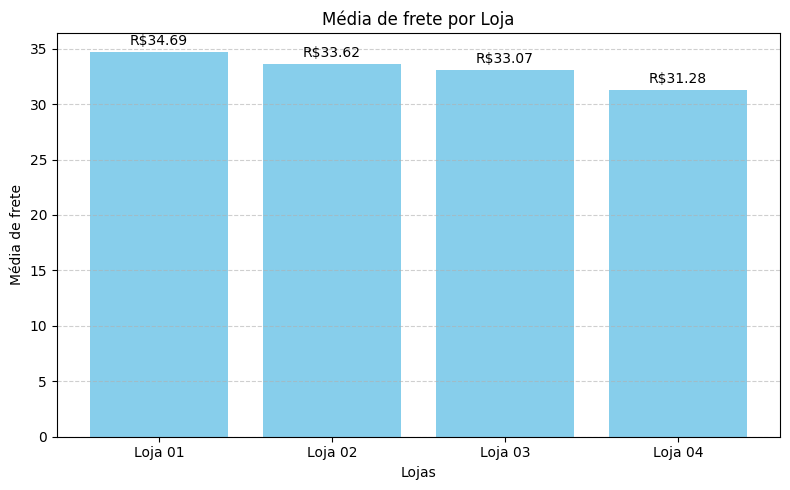

In [109]:
lojas = ['Loja 01', 'Loja 02', 'Loja 03', 'Loja 04']
valores = [mediaLoja1, mediaLoja2, mediaLoja3, mediaLoja4]


fig, ax = plt.subplots(figsize=(8,5))
plt.bar(lojas, valores, color='skyblue')
ax.set_title('Média de frete por Loja')
ax.set_xlabel('Lojas')
ax.set_ylabel('Média de frete')
ax.grid(axis='y', linestyle='--', alpha=0.6)

ax.bar_label(barras, labels=[f'R${v:,.2f}' for v in valores], padding=3)
plt.tight_layout()
plt.show()


# Heatmap

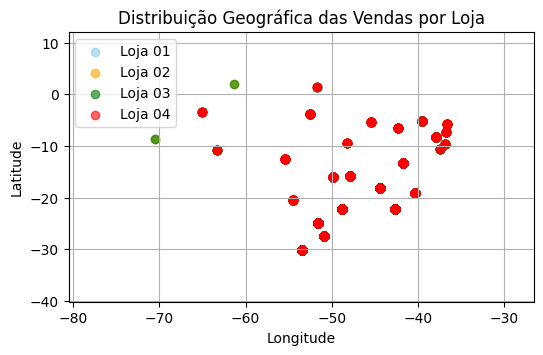

In [125]:
plt.figure(figsize=(6, 3.5))

plt.scatter(loja['lon'], loja['lat'], alpha=0.6, label='Loja 01', color='skyblue')
plt.scatter(loja2['lon'], loja2['lat'], alpha=0.6, label='Loja 02', color='orange')
plt.scatter(loja3['lon'], loja3['lat'], alpha=0.6, label='Loja 03', color='green')
plt.scatter(loja4['lon'], loja4['lat'], alpha=0.6, label='Loja 04', color='red')

plt.xlim(min(loja['lon'].min(), loja2['lon'].min(), loja3['lon'].min(), loja4['lon'].min()) - 10,
         max(loja['lon'].max(), loja2['lon'].max(), loja3['lon'].max(), loja4['lon'].max()) + 10)

plt.ylim(min(loja['lat'].min(), loja2['lat'].min(), loja3['lat'].min(), loja4['lat'].min()) - 10,
         max(loja['lat'].max(), loja2['lat'].max(), loja3['lat'].max(), loja4['lat'].max()) + 10)

plt.title('Distribuição Geográfica das Vendas por Loja')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True)
plt.show()

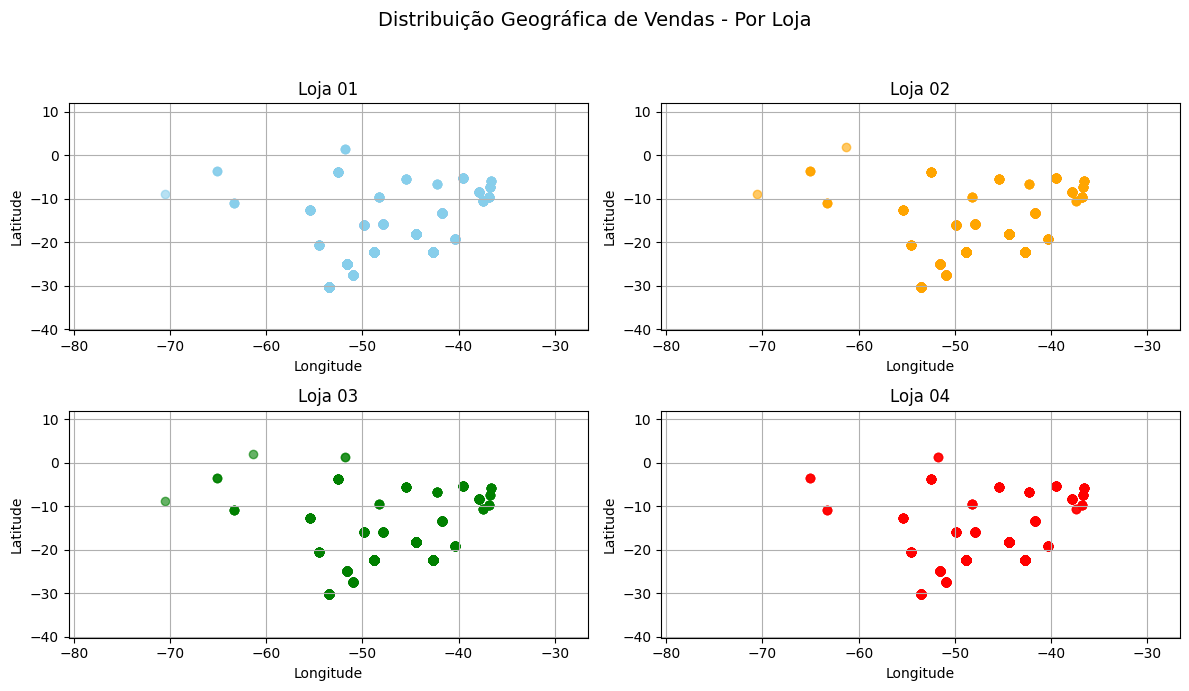

In [110]:
import matplotlib.pyplot as plt

lojas = {
    'Loja 01': {'df': loja, 'cor': 'skyblue'},
    'Loja 02': {'df': loja2, 'cor': 'orange'},
    'Loja 03': {'df': loja3, 'cor': 'green'},
    'Loja 04': {'df': loja4, 'cor': 'red'}
}

min_lon = min([l['df']['lon'].min() for l in lojas.values()]) - 10
max_lon = max([l['df']['lon'].max() for l in lojas.values()]) + 10
min_lat = min([l['df']['lat'].min() for l in lojas.values()]) - 10
max_lat = max([l['df']['lat'].max() for l in lojas.values()]) + 10

fig, axes = plt.subplots(2, 2, figsize=(12, 7))
axes = axes.flatten()

for i, (nome, dados) in enumerate(lojas.items()):
    ax = axes[i]
    df = dados['df']
    cor = dados['cor']

    ax.scatter(df['lon'], df['lat'], alpha=0.6, label=nome, color=cor)
    ax.set_xlim(min_lon, max_lon)
    ax.set_ylim(min_lat, max_lat)
    ax.set_title(nome)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.grid(True)
    #ax.legend()

plt.suptitle('Distribuição Geográfica de Vendas - Por Loja', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('imagem.png')
plt.show()

# Relatório